<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

## Image separation

(This simulation is associated with Figure 1 in FCA paper)

In [1]:
push!(LOAD_PATH, "../../src")
using FCA
using Colors, Images, FileIO, Plots, Statistics, LinearAlgebra, Combinatorics

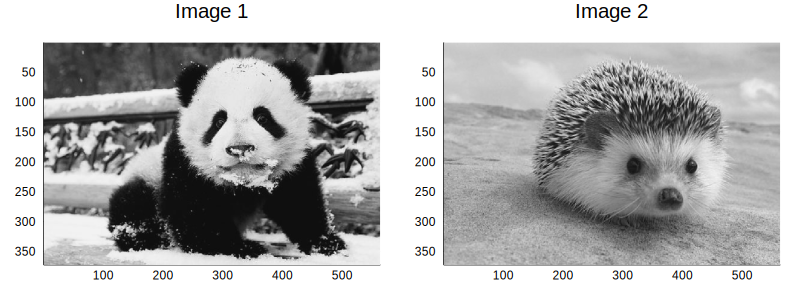

In [2]:
# import the panda image
image1 = "../images/panda.jpg"; # also try images/locust.jpg
I1 = Float64.(Gray.(load(image1)))
I1 = free_whiten([I1], mat = "rec")[1][1]


# generate the white noise, match the variance
image2 = "../images/hedgehog.jpg"
I2 = Float64.(Gray.(load(image2)))
I2 = imresize(I2, size(I1))
I2 = free_whiten([I2], mat = "rec")[1][1]
# for denoise
# I2 = randn(size(I1))*std(I1) 

# plot the original image and noise
p1 = heatmap(I1, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 1", colorbar = false)
p2 = heatmap(I2, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 2", colorbar = false)
plot(p1, p2; size=(800, 300))

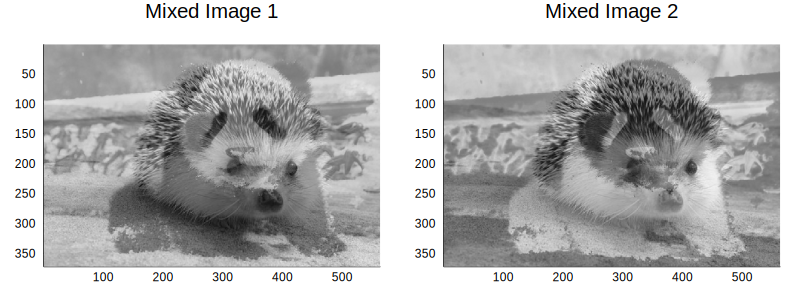

In [3]:
X = [I1, I2]
# I1 = 0.0
# I2 = 0.0 ## this clears I1 and I2 from memory

# mixing matrix
A = [sqrt(2) sqrt(2); -sqrt(2) sqrt(2)]/2
Z = A*X

# normalize the mixed images for plot
mixed1 = Z[1]/maximum(Z[1])
mixed2 = Z[2]/maximum(Z[2])

# plot the mixed images
p3 = heatmap(mixed1, yflip=true, color=:grays, aspect_ratio=:equal, title="Mixed Image 1", colorbar = false)
p4 = heatmap(mixed2, yflip=true, color=:grays, aspect_ratio=:equal, title="Mixed Image 2", colorbar = false)

# release the memory
mixed1, mixed2 = 0.0, 0.0

# show the plot
plot(p3, p4; size=(800, 300))

 39.919340 seconds (15.18 M allocations: 3.951 GiB, 6.63% gc time)


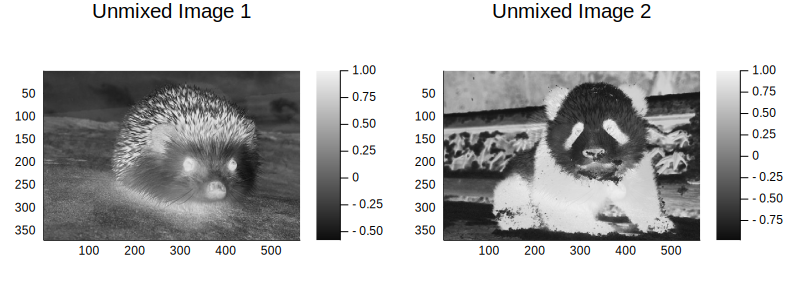

In [4]:
# Apply kurtosis-based freecf to unmix the images
@time Afca, Xfca = freecf(Z; mat = "rec", obj = "kurt")

# release the memory
# Z = 0.0
 
# normalized the unmixed images 
unmixed1 = Xfca[1]/maximum(Xfca[1])
unmixed2 = Xfca[2]/maximum(Xfca[2])

# plot the unmixed images
p5 = heatmap(unmixed1, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 1")
p6 = heatmap(unmixed2, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 2")

unmixed1 = 0.0
unmixed2 = 0.0

# show the unmixed images together with the mixed ones
plot(p5, p6; layout=2, size=(800, 300))



  5.169657 seconds (6.00 M allocations: 1.298 GiB, 11.83% gc time)


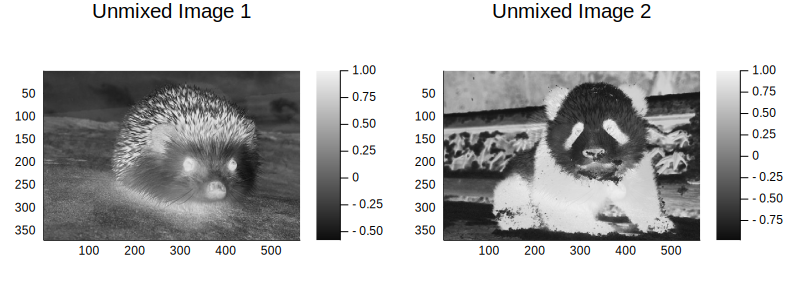

In [5]:
#### Apply ICA
@time Aica, _ = icf([vec(Z[i]) for i = 1: 2]; opt = "sphe")
Xica = pinv(Aica)*Z

# normalized the unmixed images 
unmixed1 = Xfca[1]/maximum(Xfca[1])
unmixed2 = Xfca[2]/maximum(Xfca[2])

# plot the unmixed images
p7 = heatmap(unmixed1, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 1")
p8 = heatmap(unmixed2, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 2")

unmixed1 = 0.0
unmixed2 = 0.0

# show the unmixed images together with the mixed ones
plot(p7, p8; layout=2, size=(800, 300))

In [6]:
pinv(Aica)*A

2×2 Array{Float64,2}:
   0.640127  23.7014
 -23.728      1.2931

In [7]:
err_pd(pinv(Aica)*A)

0.06078661923563057

In [8]:
err_pd(pinv(Afca)*A)

0.19046564005816102

## When FCA fails

(This simulation is associated with Figure 12 and Figure 13 in FCA paper)

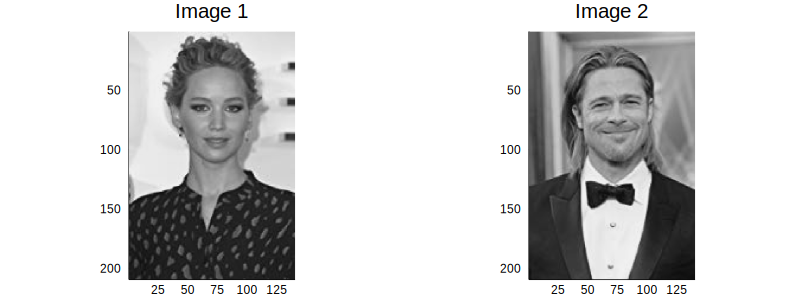

In [9]:
image1 = "../images/jennifer_lawrence.jpg"; # also try images/locust.jpg
I1 = Float64.(Gray.(load(image1)))
I1 = free_whiten([I1], mat = "rec")[1][1]

# generate the white noise, match the variance
image2 = "../images/brad_pitt.jpg"
I2 = Float64.(Gray.(load(image2)))
I2 = imresize(I2, size(I1))
I2 = free_whiten([I2], mat = "rec")[1][1]
# for denoise
# I2 = randn(size(I1))*std(I1) 

Im1 = I1/maximum(I1)
Im2 = I2/maximum(I2)

# plot the original image and noise
p1 = heatmap(Im1, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 1", colorbar = false)
p2 = heatmap(Im2, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 2", colorbar = false)
plot(p1, p2; size=(800, 300))

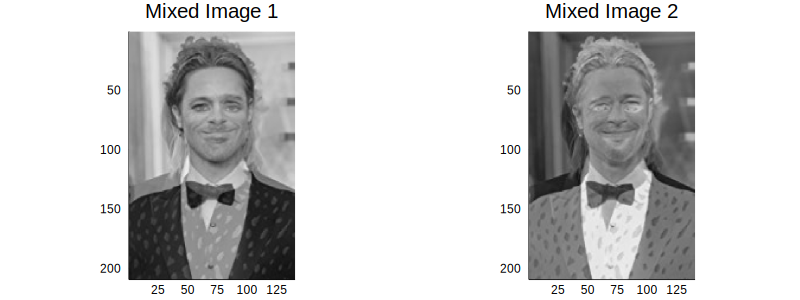

In [10]:
X = [I1, I2]
# I1 = 0.0
# I2 = 0.0 ## this clears I1 and I2 from memory

# mixing matrix
A = [sqrt(2) sqrt(2); -sqrt(2) sqrt(2)]
Z = A*X

# normalize the mixed images for plot
# mixed1 = Z[1]/maximum(Z[1])
# mixed2 = Z[2]/maximum(Z[2])

# plot the mixed images
p3 = heatmap(Z[1], yflip=true, color=:grays, aspect_ratio=:equal, title="Mixed Image 1", colorbar = false)
p4 = heatmap(Z[2], yflip=true, color=:grays, aspect_ratio=:equal, title="Mixed Image 2", colorbar = false)

# release the memory
mixed1, mixed2 = 0.0, 0.0

# show the plot
plot(p3, p4; size=(800, 300))

  1.720459 seconds (10.94 k allocations: 471.464 MiB, 6.40% gc time)
pinv(Afca) * A = [-0.903806 -0.26697; 0.489811 -0.992728]


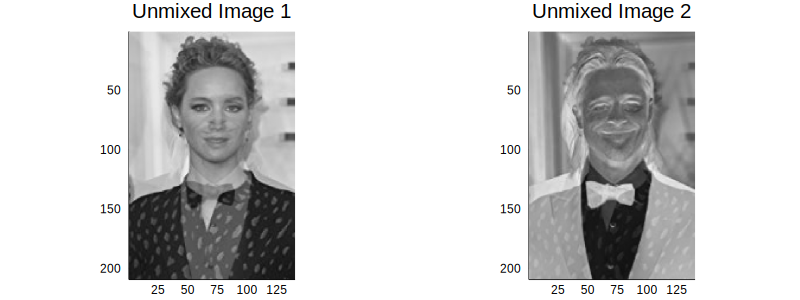

In [11]:
@time Afca, Xfca = freecf(Z; mat = "rec")
@show pinv(Afca)*A

# normalized the unmixed images 
unmixed1 = Xfca[1]/maximum(Xfca[1])
unmixed2 = Xfca[2]/maximum(Xfca[2])

# plot the unmixed images
p5 = heatmap(-unmixed1, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 1", colorbar = false)
p6 = heatmap(unmixed2, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 2", colorbar = false)

unmixed1 = 0.0
unmixed2 = 0.0

# show the unmixed images together with the mixed ones
plot(p5, p6; layout=2, size=(800, 300))

  0.518376 seconds (130.13 k allocations: 295.663 MiB, 13.83% gc time)
pinv(Aica) * A = [-0.235078 11.8844; -12.1612 2.59026]


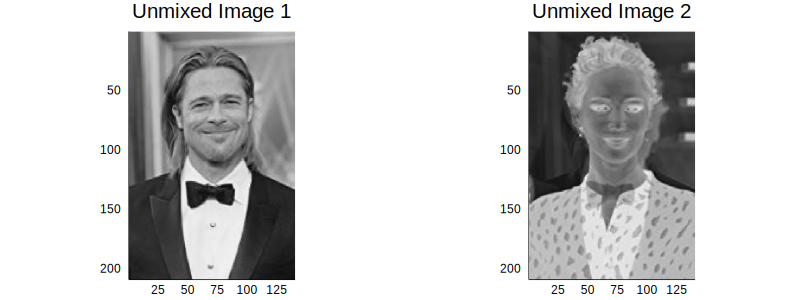

In [12]:
## ICA is unstable here...
Zica = [vec(Z[i]) for i = 1: 2]
# release the memory

@time Aica, Xica = icf(Zica)
@show pinv(Aica)*A
unmixed1 = reshape(Xica[1], size(Xfca[1]))/maximum(Xica[1])
unmixed2 = reshape(Xica[2], size(Xfca[1]))/maximum(Xica[2])

p7 = heatmap(unmixed1, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 1", colorbar = false)
p8 = heatmap(unmixed2, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 2", colorbar = false)

plot(p7, p8; layout=2, size=(800, 300))

  0.095486 seconds (2.71 k allocations: 28.292 MiB, 23.52% gc time)
pinv(Afca) * A = [0.351861 -2.61162; -1.69011 0.475312]


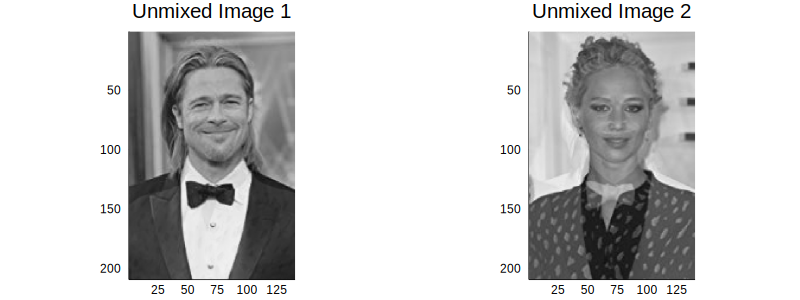

In [13]:
#### Find a subimage
left, right, down, up = 30, 100, 1, 40

Zsub = [Z[i][down:up, left:right] for i = 1:2]

@time Afca, Xfca = freecf(Zsub; mat = "rec")
@show pinv(Afca)*A

Xfcasub = pinv(Afca)*Z
# normalized the unmixed images 
unmixed1 = Xfcasub[1]/maximum(Xfcasub[1])
unmixed2 = -Xfcasub[2]/maximum(Xfcasub[2])

# plot the unmixed images
p7 = heatmap(-unmixed1, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 1", colorbar = false)
p8 = heatmap(unmixed2, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 2", colorbar = false)

unmixed1 = 0.0
unmixed2 = 0.0

# show the unmixed images together with the mixed ones
plot(p7, p8; layout=2, size=(800, 300))

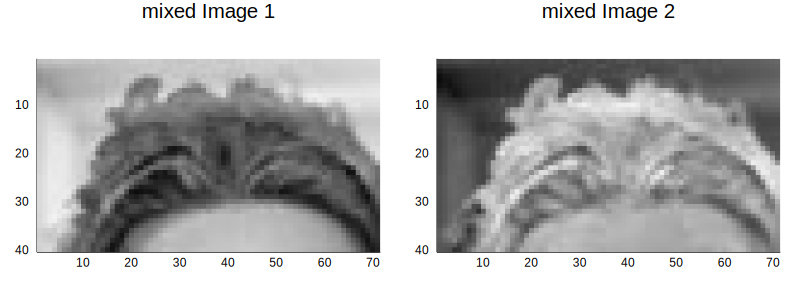

In [14]:
mixsub1 = Zsub[1]/maximum(Zsub[1])
mixsub2 = Zsub[2]/maximum(Zsub[2])

psub1 = heatmap(mixsub1, yflip=true, color=:grays, aspect_ratio=:equal, title="mixed Image 1", colorbar = false)
psub2 = heatmap(mixsub2, yflip=true, color=:grays, aspect_ratio=:equal, title="mixed Image 2", colorbar = false)

plot(psub1, psub2; layout=2, size=(800, 300))

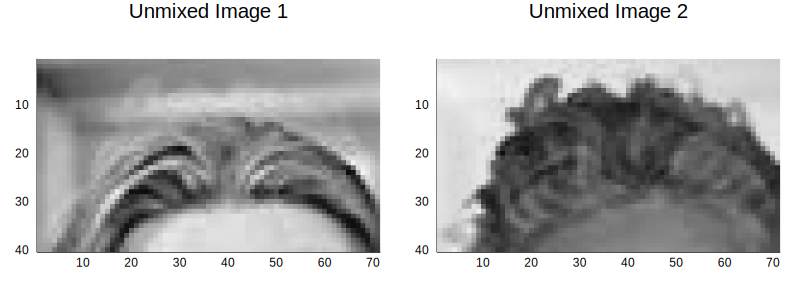

In [15]:
# normalized the unmixed images 
unmixedsub1 = Xfca[1]/maximum(Xfca[1])
unmixedsub2 = -Xfca[2]/maximum(Xfca[2])

# plot the unmixed images
p9 = heatmap(-unmixedsub1, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 1", colorbar = false)
p10 = heatmap(unmixedsub2, yflip=true, color=:grays, aspect_ratio=:equal, title="Unmixed Image 2", colorbar = false)

unmixed1 = 0.0
unmixed2 = 0.0

# show the unmixed images together with the mixed ones
plot(p9, p10; layout=2, size=(800, 300))

## How to visualize the freeness between the images

(This simulation is associated with Figure 14 in FCA paper)

The FCA has difference performance when being applied to above two pairs of the images. From the separating results, we observe that the panda and hedgehog images are free, while images of Jennifer Lawrence and Brad Pitt are not so free. We want to visulize this obersevation from the image data.

Given two images $X_1, X_2 \in \mathbb R^{N \times M}$, consider their SVDs $X_1 = U_1 \Sigma_1 V_1^T$ and $X_2 = U_2 \Sigma_2 V_2^T$. We say $X_1$ and $X_2$ are freely independent if $\Sigma_1$ and $\Sigma_2$ converges to a deterministic spectrum and $U_1$ and $U_2$ follow from independent Haar measure (same for $V_1$ and $V_2$). 

Thus, one can plot the heatmap of 

$$
    N\cdot [(U_1^T U_2).^\wedge2].
$$

The factor $N$ is picked such that the entries of resulting matrice are of unity order if $U_1$ and $U_2$ follow from independent Haar measure over the orthgonal group.

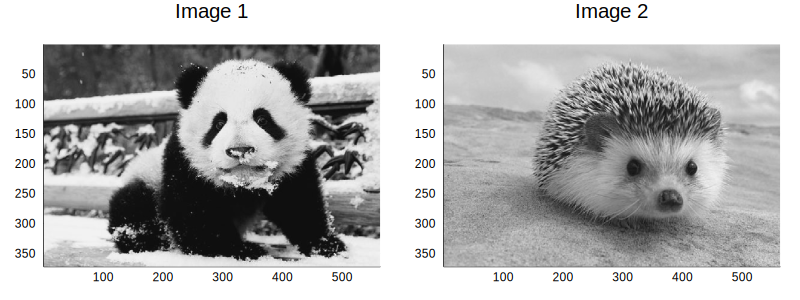

In [16]:
# import the panda image
image1 = "../images/panda.jpg"; # also try images/locust.jpg
I1 = Float64.(Gray.(load(image1)));

# generate the white noise, match the variance
image2 = "../images/hedgehog.jpg";
I2 = Float64.(Gray.(load(image2)));
I2 = imresize(I2, size(I1));

# plot the original image and noise
p1 = heatmap(I1, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 1", colorbar = false)
p2 = heatmap(I2, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 2", colorbar = false)
plot(p1, p2; size=(800, 300))

We plot 
$$
    N\cdot [(U_1^T U_2).^\wedge2] \quad \text{and} \quad M\cdot [(V_1^T V_2).^\wedge2]
$$
for panda and hedgehog images. We expect these two resulting matrix are uniform.

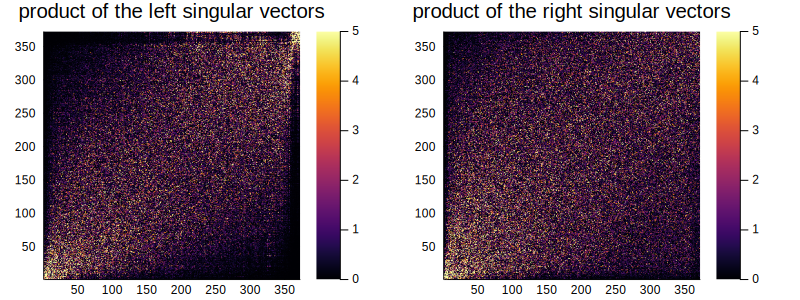

In [17]:
### plots showes that freeness between images
U1, _, V1 = svd(I1);
U2, _, V2 = svd(I2);


pdUprod = size(U1,1)*(U1'*U2).^2
pdVprod = size(V1,1)*(V1'*V2).^2

p1 = heatmap(pdUprod, clim = (0,5), title = "product of the left singular vectors")
p2 = heatmap(pdVprod, clim = (0,5), title = "product of the right singular vectors")
plot(p1, p2, layout = (1,2), size = (800,300))

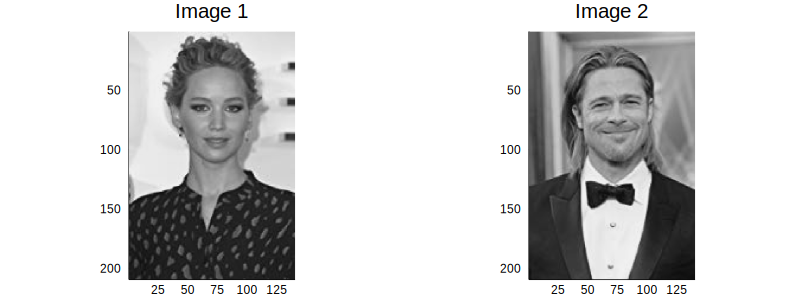

In [18]:
#### for the Jennifer and Brad iamges
image1 = "../images/jennifer_lawrence.jpg"; # also try images/locust.jpg
I1 = Float64.(Gray.(load(image1)))
I1 = free_whiten([I1], mat = "rec")[1][1]

# generate the white noise, match the variance
image2 = "../images/brad_pitt.jpg"
I2 = Float64.(Gray.(load(image2)))
I2 = imresize(I2, size(I1))
I2 = free_whiten([I2], mat = "rec")[1][1]
# for denoise
# I2 = randn(size(I1))*std(I1) 

Im1 = I1/maximum(I1)
Im2 = I2/maximum(I2)

# plot the original image and noise
p1 = heatmap(Im1, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 1", colorbar = false)
p2 = heatmap(Im2, yflip=true, color=:grays, aspect_ratio=:equal, title="Image 2", colorbar = false)
plot(p1, p2; size=(800, 300))

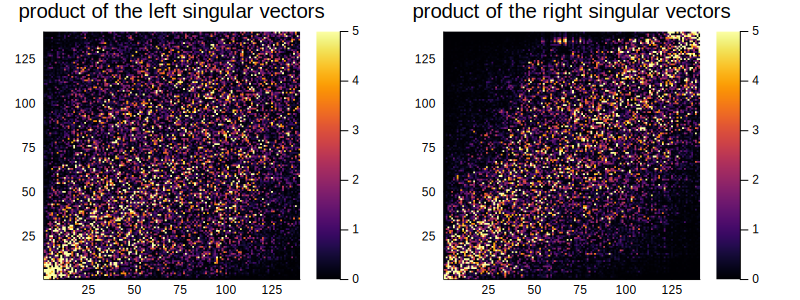

In [19]:
### plots showes that freeness between images
U1, _, V1 = svd(I1);
U2, _, V2 = svd(I2);


pdUprod = size(U1,1)*(U1'*U2).^2
pdVprod = size(V1,1)*(V1'*V2).^2

p1 = heatmap(pdUprod, clim = (0,5), title = "product of the left singular vectors")
p2 = heatmap(pdVprod, clim = (0,5), title = "product of the right singular vectors")
plot(p1, p2, layout = (1,2), size = (800,300))

Clearly, the product of the right singular vectors is not uniform. This explains why FCF performs poorly when separating this pair of the images.